In [1]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")

# Configure the environment for continuous actions
env.unwrapped.configure(
    {
        "action": {"type": "ContinuousAction"}
    }
)

# Wrap the environment
env.reset()

(array([[ 1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
          0.        ],
        [ 1.        ,  0.29388925,  0.        , -0.18548618,  0.        ,
          0.        ],
        [ 1.        ,  0.5792168 ,  0.        , -0.1741108 ,  0.        ,
          0.        ],
        [ 1.        ,  0.8757802 ,  0.08      , -0.17083482,  0.        ,
          0.        ],
        [ 1.        ,  1.        ,  0.04      , -0.15899962,  0.        ,
          0.        ],
        [ 1.        ,  1.        ,  0.04      , -0.0552314 ,  0.        ,
          0.        ],
        [ 1.        ,  1.        ,  0.        , -0.11610467,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.     

In [4]:
# Action noise for exploration
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(
    mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions)
)

# TD3 model setup
model = TD3(
    "MlpPolicy",
    env,
    policy_kwargs=dict(net_arch=[64, 64]),
    action_noise=action_noise,
    learning_rate=0.001,
    buffer_size=100000,
    learning_starts=5000,
    batch_size=64,
    tau=0.01,
    gamma=0.95,
    train_freq=(1, "step"),
    gradient_steps=1,
    verbose=1,
    tensorboard_log="./td3_highway_tensorboard/",
)

# Train the model
model.learn(total_timesteps=8000, tb_log_name="td3_highway")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./td3_highway_tensorboard/td3_highway_7
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.5      |
|    ep_rew_mean     | 0.357    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4        |
|    time_elapsed    | 1        |
|    total_timesteps | 6        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.38     |
|    ep_rew_mean     | 0.22     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 4        |
|    time_elapsed    | 2        |
|    total_timesteps | 11       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.33     |
|    ep_rew_mean     | 0.21     |
| time/              |          |
|    

In [7]:
model.learn(total_timesteps=5000, tb_log_name="td3_highway",reset_num_timesteps=False)

Logging to ./td3_highway_tensorboard/td3_highway_7
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.77     |
|    ep_rew_mean     | 0.832    |
| time/              |          |
|    episodes        | 4884     |
|    fps             | 3        |
|    time_elapsed    | 0        |
|    total_timesteps | 8001     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.7      |
|    ep_rew_mean     | 0.796    |
| time/              |          |
|    episodes        | 4888     |
|    fps             | 4        |
|    time_elapsed    | 2        |
|    total_timesteps | 8009     |
| train/             |          |
|    actor_loss      | -1.47    |
|    critic_loss     | 0.303    |
|    learning_rate   | 0.001    |
|    n_updates       | 3008     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.7     

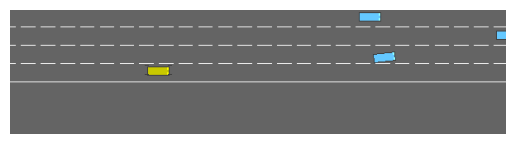

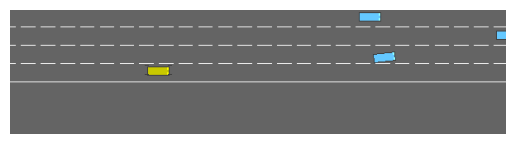

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# modewl = TD3.load("td3_highway_model")
# # Create the environment
# env = gym.make("highway-v1",render_mode="rgb_array")

# # Configure the environment for continuous actions
# env.unwrapped.configure({
#     "action": {"type": "ContinuousAction"},
#     "duration": 40,  # [s]
#     "lanes_count": 4,
#     "vehicles_count": 50,
#     "controlled_vehicles": 1,
#     "initial_lane_id": None,
#     "ego_spacing": 2,
#     "collision_reward": -1,  
#     "right_lane_reward": 0.4,
#     "high_speed_reward": 0.8,
#     "lane_change_reward": 0,
#     "reward_speed_range": [10, 30],
#     "reverse_reward": -2,
#     "stopping_penalty": -2,
#     "normalize_reward": True,
#     "offroad_terminal": False,
# })

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [6]:
# Save the trained model
model.save("td3_highway_model")

# Close the environment
# env.close()

print("Training complete. Model saved as 'td3_highway_model.zip'.")

Training complete. Model saved as 'td3_highway_model.zip'.
